# Data Dictionary :

In [1]:
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Steps:

In [3]:
data_di = {'Feature' :['enrollee_id','city','city_ development _index','gender','relevent_experience','enrolled_university',
                    'education_level','major_discipline','experience','company_size','company_type','last_new_job',
                    'training_hours','target 0','target 1'],
           'Explanation':['Unique ID for candidate','City code','Developement index of the city (scaled)',
                          'Gender of candidate','Relevant experience of candidate',
                          'Type of University course enrolled if any',
                        'Education level of candidate','Education major discipline of candidate',
                        'Candidate total experience in years','No of employees in current employers company',
                        'Type of current employer','Difference in years between previous job and c.',
                        'training hours completed','Not looking for job change','looking for job change']    
}
data_dict = pd.DataFrame.from_dict(data_di)
data_dict.reset_index(drop=True, inplace=True)
data_dict

,Feature,Explanation
0,enrollee_id,Unique ID for candidate
1,city,City code
2,city_ development _index,Developement index of the city (scaled)
3,gender,Gender of candidate
4,relevent_experience,Relevant experience of candidate
5,enrolled_university,Type of University course enrolled if any
6,education_level,Education level of candidate
7,major_discipline,Education major discipline of candidate
8,experience,Candidate total experience in years
9,company_size,No of employees in current employers company


# Read csv:

In [4]:
df_train = pd.read_csv('aug_train.csv')
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df_train.describe(include=[object])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


# Checking Null Value
# Null value imputation

In [8]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
df_train = df_train.fillna(method='ffill')
df_train = df_train.fillna(method='bfill')
#Using Forward fill Method we fill all Null Values.

In [10]:
df_train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

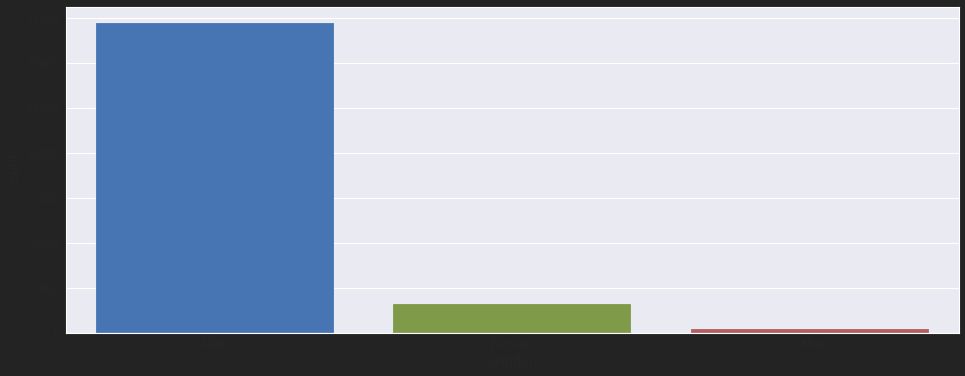

In [11]:
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
sns.countplot(x='gender',data=df_train)
plt.show()

# Dropping Unnecessary Column

In [12]:
df_train.drop('enrollee_id',axis=1,inplace=True)
# As enrollment_id  dosent contribute for model Prediction Hence We Drop the Feature.

# Treating Outliers

<AxesSubplot:>

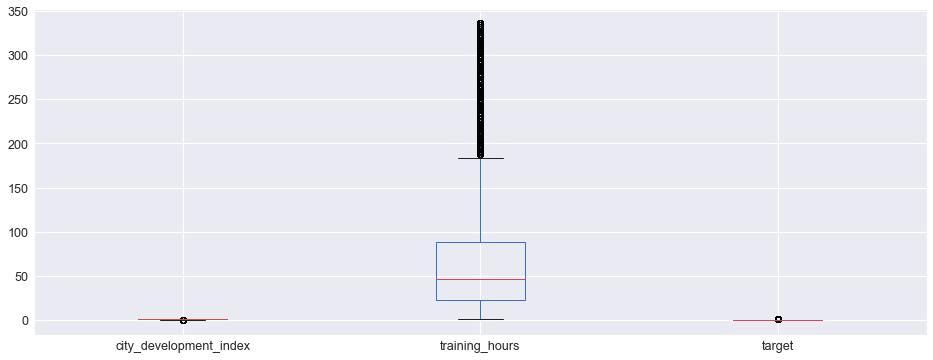

In [13]:
plt.figure(figsize=(16,6))
df_train.boxplot()

###### Before Capping Outliers :

In [14]:
features = ['city_development_index','training_hours']

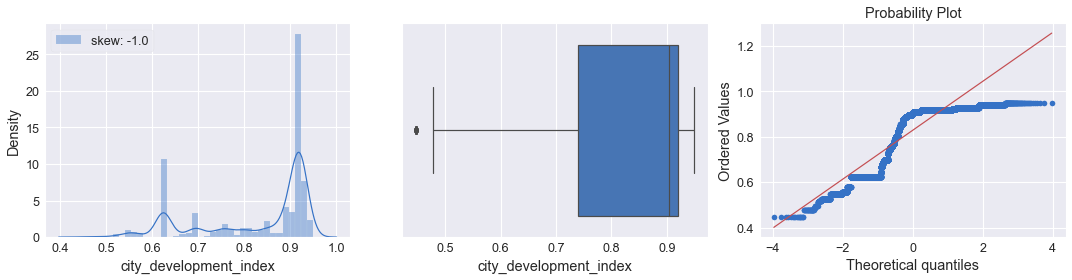

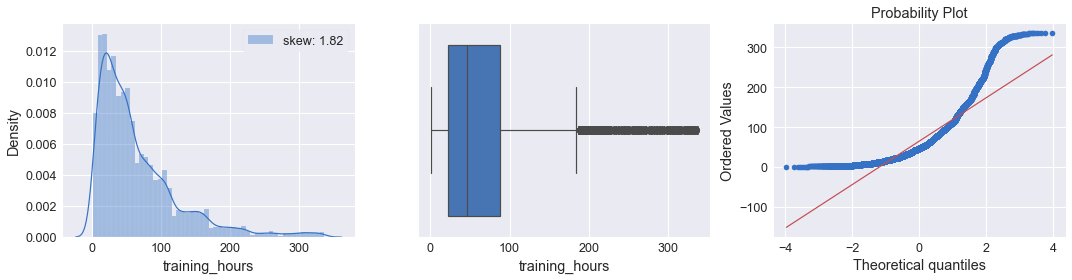

In [15]:
#sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_train[col])
    plt.subplot(133)
    stats.probplot(df_train[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [16]:
df_cap = df_train.copy()

In [17]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [18]:
iqr_capping(df_cap, features, 1.5)

###### AFTER OUTLIERS CAPPING 

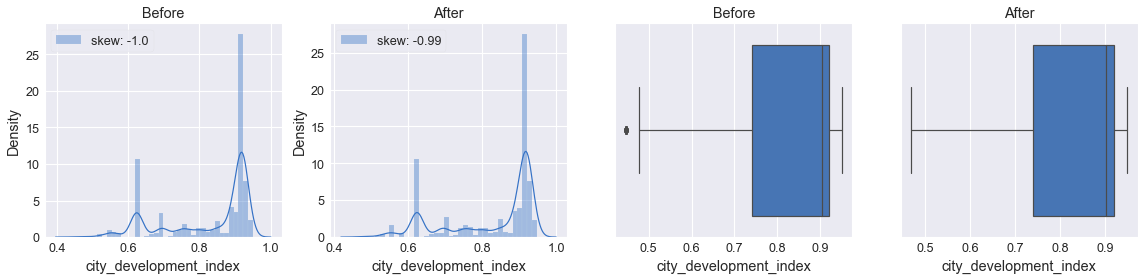

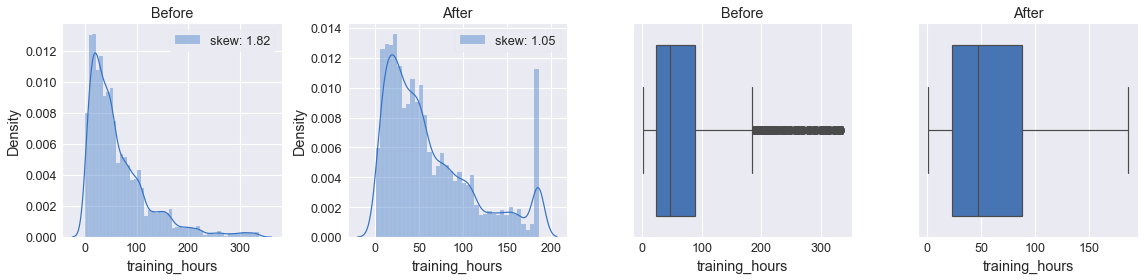

In [19]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Variance Threshold

    The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. 

Ref = https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

Variance Threshold: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

In [20]:
from sklearn.feature_selection import VarianceThreshold
df_num = df_train.select_dtypes(include=np.number)
X = df_num

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
print(v_threshold.get_support())
print(v_threshold.get_params())

[ True  True  True]
{'threshold': 0}


# Checking Correlation

In [21]:
cor = df_train.corr()
cor.style.applymap(lambda x: 'background-color : green' if x>0.1 else '')

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


<Figure size 1440x648 with 0 Axes>

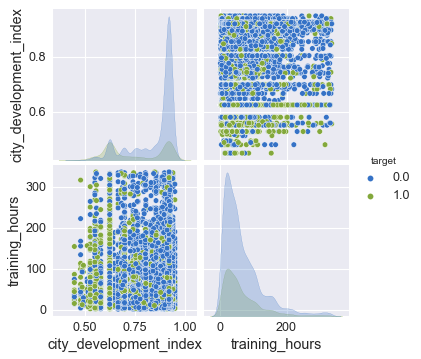

In [22]:
plt.figure(figsize=(20,9))
sns.pairplot(df_train,hue='target')
plt.show()

# Encoding
Scaling
Performing Train Test split

In [23]:
df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [24]:
df_train.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [25]:
df_train.city.value_counts()# Label Encoding...

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

https://cdn.analyticsvidhya.com/wp-content/uploads/2020/01/final_pipeline.png

# Pipeline:

In [36]:
X = df_train.drop('target',axis=1)
y = df_train.target

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [27]:
df = pd.get_dummies(df_train,columns=['gender','relevent_experience','enrolled_university','experience','education_level','last_new_job','major_discipline','company_type','company_size'],drop_first=True)

In [28]:
df.head()

,city,city_development_index,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,experience_10,...,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10
0,city_103,0.920,36,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,city_40,0.776,47,0.0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,city_21,0.624,83,0.0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,city_115,0.789,52,1.0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,city_162,0.767,8,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['city'] = le.fit_transform(X['city'])


In [42]:
X['gender'] = le.fit_transform(X['gender'])
X['relevent_experience'] = le.fit_transform(X['relevent_experience'])
X['enrolled_university'] = le.fit_transform(X['enrolled_university'])
X['education_level'] = le.fit_transform(X['education_level'])
X['major_discipline'] = le.fit_transform(X['major_discipline'])
X['experience'] = le.fit_transform(X['experience'])
X['company_size'] = le.fit_transform(X['company_size'])
X['company_type'] = le.fit_transform(X['company_type'])
X['last_new_job'] = le.fit_transform(X['last_new_job'])

In [45]:
X.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,1,0,2,0,5,21,4,5,0,36
1,77,0.776,1,1,2,0,5,6,4,5,4,47
2,64,0.624,1,1,0,0,5,15,4,5,5,83
3,14,0.789,1,1,0,0,1,20,4,5,5,52
4,50,0.767,1,0,2,2,5,21,4,1,3,8


# logistic Regression:

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))
print("confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score = ",accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86      3602
         1.0       0.52      0.10      0.17      1188

    accuracy                           0.75      4790
   macro avg       0.64      0.54      0.51      4790
weighted avg       0.70      0.75      0.69      4790

confusion Matrix:
 [[3489  113]
 [1067  121]]
Accuracy Score =  0.7536534446764092


###### Auc/Roc Curve:-

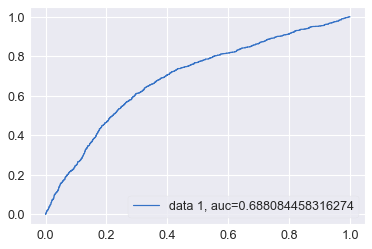

In [77]:
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#   Decision Tree :

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))
print("confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score = ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      3602
         1.0       0.36      0.38      0.37      1188

    accuracy                           0.68      4790
   macro avg       0.58      0.58      0.58      4790
weighted avg       0.68      0.68      0.68      4790

confusion Matrix:
 [[2806  796]
 [ 738  450]]
Accuracy Score =  0.679749478079332


###### Decision Tree Graph...

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text

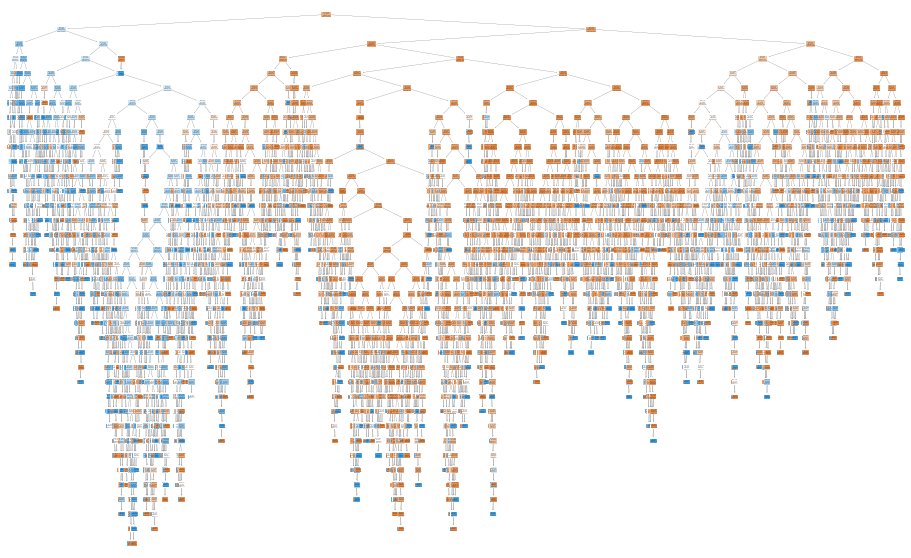

In [74]:
plt.figure(figsize = (16,10))
plot_tree(dt,filled=True);